In [1]:
import os
hf_token = os.getenv("HUGGINGFACE_TOKEN")

In [3]:
# 1. visit hf.co/pyannote/speaker-diarization and accept user conditions (only if requested)
# 2. visit hf.co/settings/tokens to create an access token (only if you had to go through 1.)
# 3. instantiate pretrained speaker diarization pipeline
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization",
                                    use_auth_token=hf_token)

# 4. apply pretrained pipeline
diarization = pipeline("pyannote_sample.wav")

# 5. print the result
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

In [2]:
# 1. visit hf.co/pyannote/segmentation and accept user conditions
# 2. visit hf.co/settings/tokens to create an access token
# 3. instantiate pretrained model
from pyannote.audio import Model
model = Model.from_pretrained("pyannote/segmentation", 
                              use_auth_token=hf_token)

from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation=model)
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)
vad = pipeline("pyannote_sample.wav")
# `vad` is a pyannote.core.Annotation instance containing speech regions


/home/cmagganas/anaconda3/envs/pyannote/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


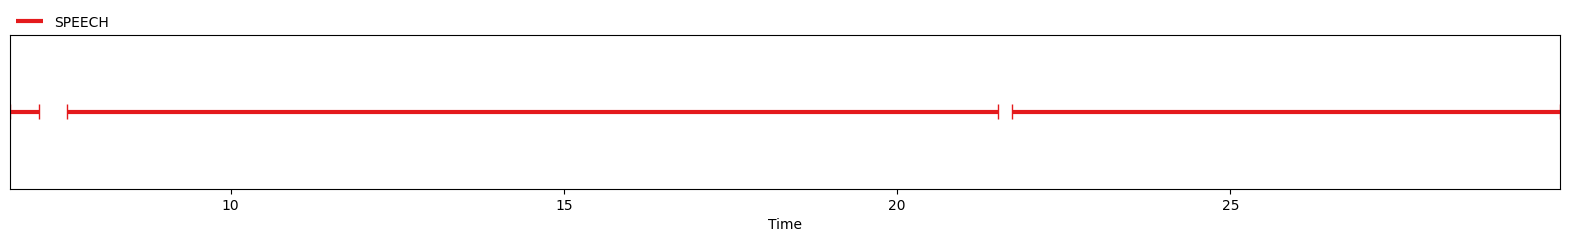

In [3]:
vad

In [4]:
# Voice activity detection
# extract the timestamps of from vad, which is a pyannote.core.Annotation instance, and put into a list
vad_list = []
for turn, _, _ in vad.itertracks(yield_label=True):
    vad_list.append([turn.start, turn.end])
vad_list


[[6.6909375, 7.129687500000001],
 [7.551562500000001, 21.5071875],
 [21.7265625, 29.9446875]]

In [1]:
import joblib

# Load the model from the .joblib file
model = joblib.load("Code/amelia.joblib")

# Print the type of the loaded object
print(type(model))


2023-03-17 11:01:04.127624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 11:01:05.099392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-17 11:01:05.099438: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-17 11:01:08.864406: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

BadZipFile: File is not a zip file